In [1]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import scipy.cluster.hierarchy as shc

In [3]:
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.15, 's' : 90, 'linewidths':0}

In [4]:
Crime = pd.read_csv('crime_data.csv')
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
Crime.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [8]:
Crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
Crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
print(f"Missing values in each variable: \n{Crime.isnull().sum()}")

Missing values in each variable: 
Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64


In [11]:
print(f"Duplicated rows: {Crime.duplicated().sum()}")

Duplicated rows: 0


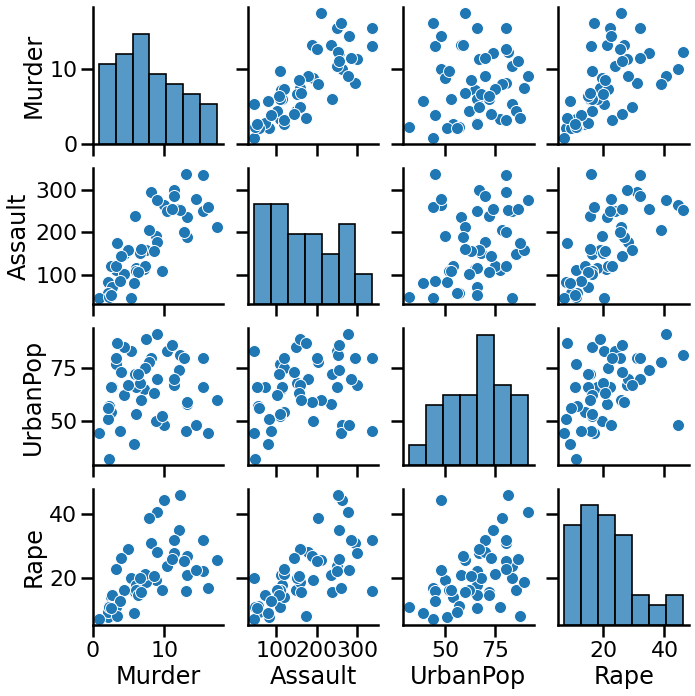

In [12]:
sns.pairplot(Crime.iloc[:,0:5])

In [13]:
# MODEL 1 - KMeans
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)


In [14]:
df_norm = norm_func(Crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [15]:
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
print('Inertia : ',kmeans.inertia_)
print('Score : ',kmeans.score)


Inertia :  1.3461546329597947
Score :  <bound method KMeans.score of KMeans(n_clusters=14)>


([<matplotlib.axis.XTick at 0x2061c33ddf0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

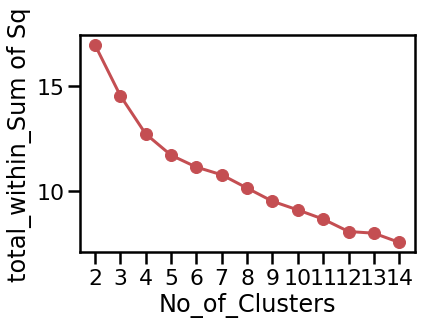

In [16]:
plt.plot(k,TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_Sum of Sq")
plt.xticks(k)

In [17]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model1=KMeans(n_clusters=5) 
model1.fit(df_norm)

KMeans(n_clusters=5)

In [18]:
model1.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model1.labels_)  # converting numpy array into pandas series object 
Crime['clust']=md 
# creating a  new column and assigning it to new column 
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,4
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,4


## KMeans Clustering Model - Graph


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


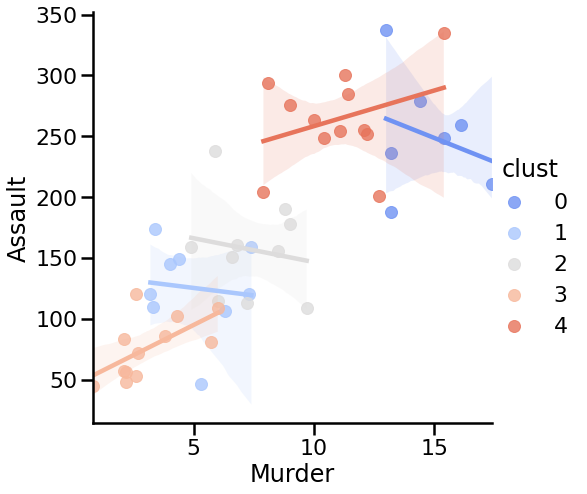

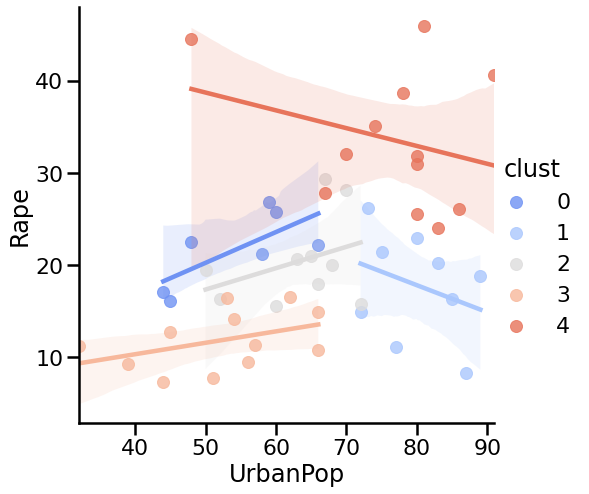

In [19]:
print("## KMeans Clustering Model - Graph")
sns.lmplot('Murder', 'Assault', data=Crime, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
sns.lmplot('UrbanPop', 'Rape', data=Crime, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
plt.show()

In [20]:
# MODEL 2 - HIERARCHIAL CLUSTERING
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model2.fit_predict(Crime.iloc[:,1:])


array([1, 1, 2, 0, 2, 0, 3, 1, 2, 0, 4, 3, 1, 3, 4, 3, 3, 1, 4, 2, 0, 1,
       4, 1, 0, 3, 3, 1, 4, 0, 2, 1, 2, 4, 3, 0, 0, 3, 0, 1, 4, 0, 0, 3,
       4, 0, 0, 4, 4, 0], dtype=int64)

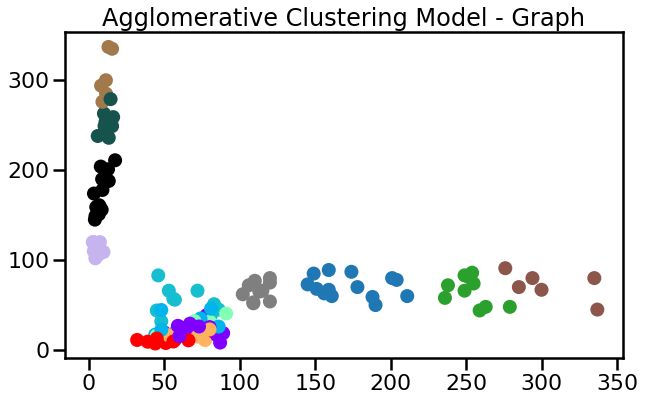

In [21]:
plt.figure(figsize=(10, 6))
plt.title("Agglomerative Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model2.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model2.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model2.labels_, cmap='cubehelix')
plt.show()

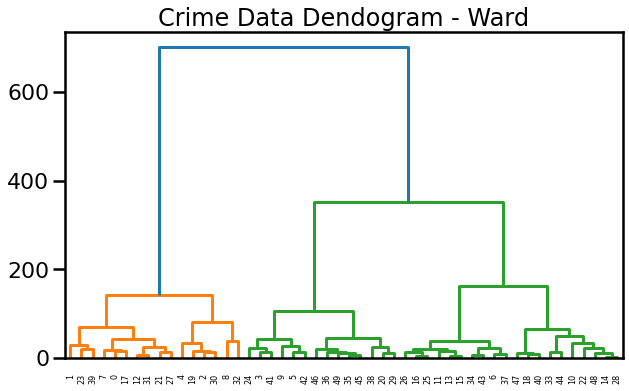

In [22]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Ward")
dend = shc.dendrogram(shc.linkage(Crime.iloc[:,1:], method='ward'))

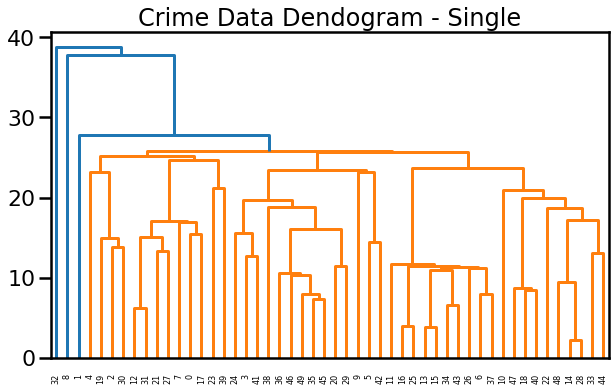

In [24]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Single")
dend = shc.dendrogram(shc.linkage(Crime.iloc[:,1:], method='single'))

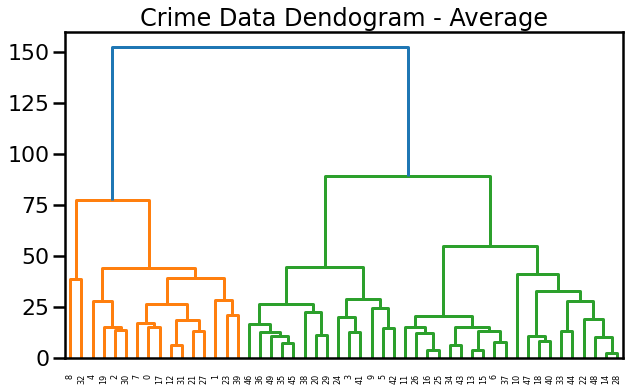

In [25]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Average")
dend = shc.dendrogram(shc.linkage(Crime.iloc[:,1:], method='average'))

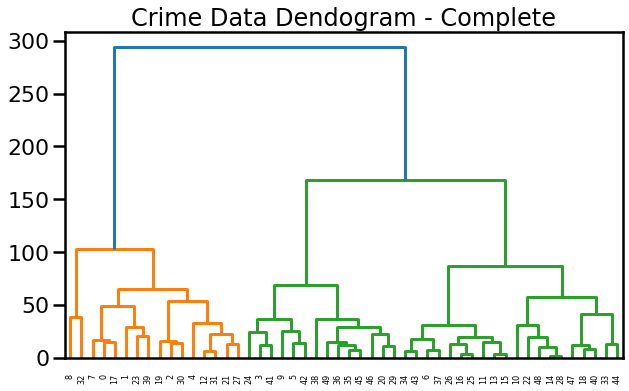

In [26]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Complete")
dend = shc.dendrogram(shc.linkage(Crime.iloc[:,1:], method='complete'))

In [27]:
# MODEL 3 - Birch Clustering
model3 = Birch(threshold=0.01, n_clusters=10)
model3.fit(Crime.iloc[:,1:4])
model3.predict(Crime.iloc[:,1:4])
print(model3.labels_)

[3 7 6 2 6 2 1 3 4 2 5 1 3 1 5 1 1 3 8 6 0 3 5 7 0 1 1 3 5 0 6 3 4 9 1 0 0
 1 0 7 8 2 2 1 9 0 0 8 5 0]


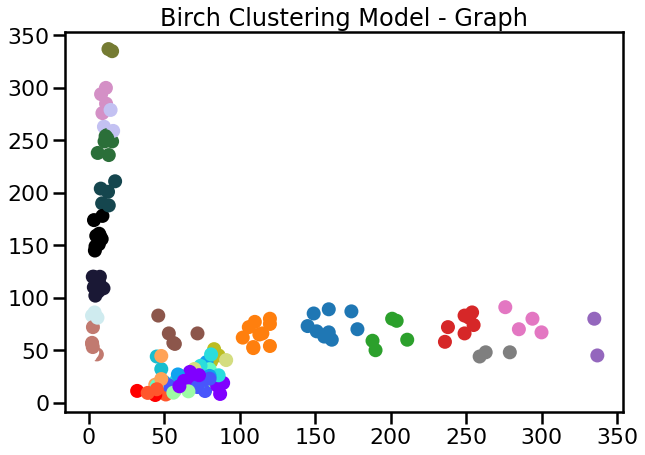

In [28]:
plt.figure(figsize=(10, 7))
plt.title("Birch Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model3.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model3.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model3.labels_, cmap='cubehelix')
plt.show()

In [29]:
# MODEL 4 - DBSCAN Clustering
model4 = DBSCAN(eps=0.30, min_samples=9)
model4.fit_predict(Crime.iloc[:,1:4])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

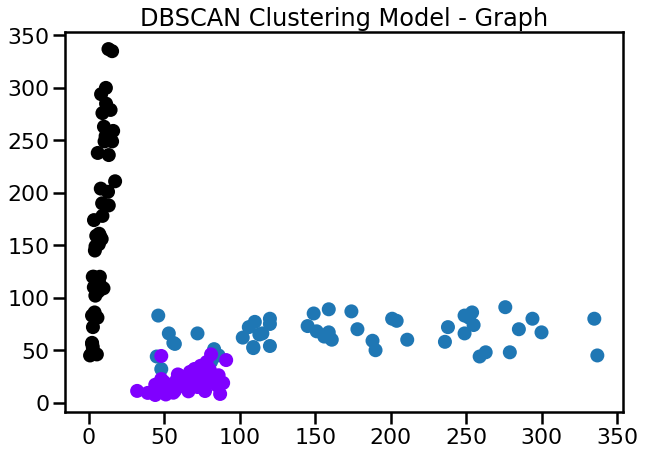

In [30]:
plt.figure(figsize=(10, 7))
plt.title("DBSCAN Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model4.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model4.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model4.labels_, cmap='cubehelix')
plt.show()

In [31]:
# MODEL 5 - MeanShift Clustering
model5 = MeanShift()
model5.fit_predict(Crime.iloc[:,1:4])

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 2], dtype=int64)

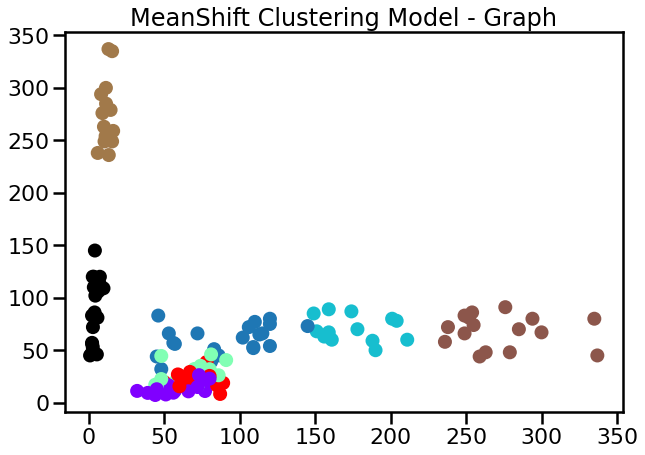

In [32]:
plt.figure(figsize=(10, 7))
plt.title("MeanShift Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model5.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model5.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model5.labels_, cmap='cubehelix')
plt.show()

In [33]:
# MODEL 6 - OPTICS Clustering
model6 = OPTICS(eps=0.8, min_samples=10)
model6.fit_predict(Crime.iloc[:,1:4])

array([ 0,  0,  0, -1,  0,  0,  1,  0, -1,  0, -1,  1,  0,  1, -1,  1,  1,
        0,  1,  0, -1,  0, -1,  0, -1,  1,  1,  0, -1, -1,  0,  0, -1, -1,
        1, -1, -1,  1, -1,  0,  1, -1,  0,  1, -1, -1, -1, -1, -1, -1])

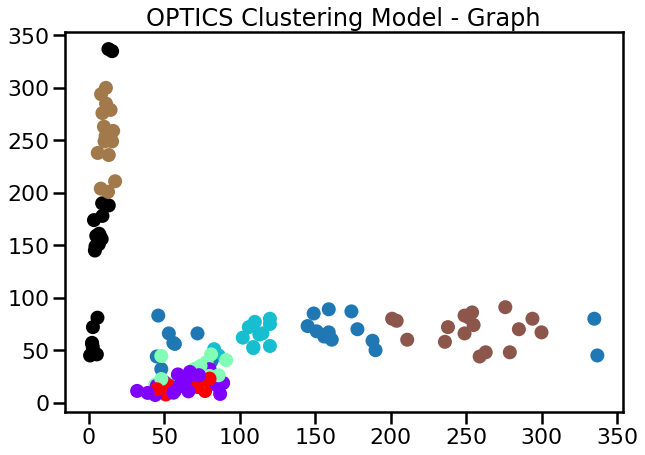

In [34]:
plt.figure(figsize=(10,7))
plt.title("OPTICS Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model6.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model6.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model6.labels_, cmap='cubehelix')
plt.show()

In [35]:
# MODEL 7 - Spectral Clustering
model7 = SpectralClustering(n_clusters=2)
model7.fit_predict(Crime.iloc[:,1:4])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

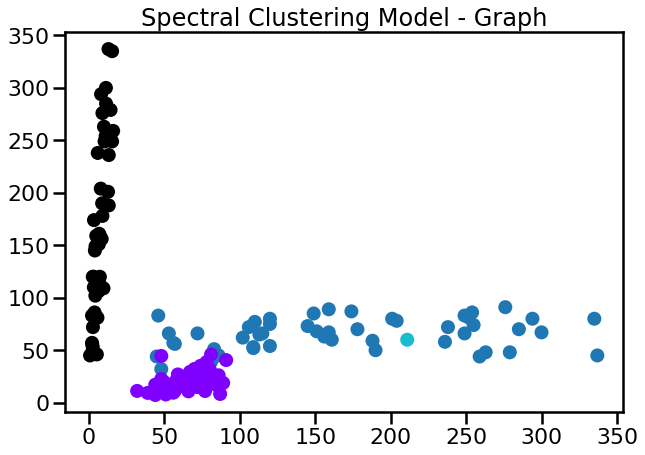

In [36]:
plt.figure(figsize=(10,7))
plt.title("Spectral Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model7.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model7.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model7.labels_, cmap='cubehelix')
plt.show()